# Assessment Problems

This notebook provides a structured presentation of the assessment problem solutions and demonstrates my achievement of the learning outcomes for the Applied Statistics module.

Before starting the problems, all the required libraries are imported.  
This ensures that the notebook is ready for calculations and simulations from the very beginning.  

Placing the imports here makes it immediately clear which tools will be used and ensures a consistent environment for all subsequent analyses.


In [ ]:
# Standard library imports (none here)

# Third-party imports
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting
from scipy.stats import ttest_ind  # Statistical functions (t-test)
from scipy.stats import f, t  # For computing p-values of t-tests and equivalent F-tests
from scipy.stats import norm # Normal distribution functions


***
***

## Problem 1: Extending the Lady Tasting Tea

---

### Research and Development

---

#### Research Context

The [*Lady Tasting Tea*](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment, introduced by Sir Ronald A. Fisher in 1935, is a classic example of **design of experiments** and **hypothesis testing**.
A lady claimed she could distinguish whether milk was poured into a cup before or after the tea was added.

The original experiment used eight cups: four milk-first ('M') and four tea-first ('T').
The probability of perfectly identifying the milk-first cups by chance was very low (~0.0143).

Extending the experiment to twelve cups, with four milk-first and eight tea-first, allows us to **estimate the likelihood of success by chance in a larger experiment**.

---

#### Development Considerations

* **Representation:** Using 'M' and 'T' provides a clear and simple way to distinguish between milk-first and tea-first cups.  
* **Randomisation:** Each trial is independent, reflecting the null hypothesis.  
* **Simulation scale:** The experiment uses simple loop-based logic to maintain clarity and transparency in the implementation. 
* **Statistical insight:** Demonstrates probability estimation with explicit loops.  

***

#### Hypotheses

**Null Hypothesis (H₀):**  
The lady cannot distinguish between milk-first and tea-first cups beyond random chance.  

**Alternative Hypothesis (H₁):**  
The lady can distinguish milk-first from tea-first cups with accuracy greater than chance.

---

### Experiment Setup

---

Before running the experiment, a fixed random seed is set so that NumPy gives the same random choices every time. This makes the results easier to verify later and helps maintain consistency if someone else wants to repeat the same test.

[The Curious Case of 42: Why Python Loves This Number for Randomization](https://medium.com/ai-simplified-in-plain-english/python-random-seed-42-125a3f2e068f) articule on the Medium website gives interesting explain of why the number 42 is often used by programmers.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)


The experiment defines the total number of cups, specifying how many are milk-first and how many are tea-first.

In [3]:
# Total number of cups in the experiment
total_cups = 12  

# Number of cups where milk was poured first
cups_milk_first = 4  

# Number of cups where tea was poured first
cups_tea_first = 8  


The theoretical probability of correctly identifying all milk-first cups will be calculated using combinatorics.
The total number of unique combinations of milk-first cups is computed, and the probability of a perfect guess is derived.

To find out how many ways the milk-first cups can be chosen from all cups, `numpy.arange` and `numpy.prod` are used.  
`np.arange` creates a sequence of numbers corresponding to the numerator of the combination formula, and `np.prod` multiplies them together to get the total product.  
This calculation gives the number of possible selections of milk-first cups **before considering the order** in which they appear.  
For more details, see the [NumPy documentation on prod](https://numpy.org/doc/stable/reference/generated/numpy.prod.html) and [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [4]:
# Combinatorial calculation of the probability of correctly guessing all milk-first cups

# Number of ways to choose cups_milk_first cups from total_cups
ways_to_choose = np.prod(np.arange(total_cups, total_cups - cups_milk_first, -1))

# Number of ways to order the milk-first cups among themselves
ways_to_order_milk = np.prod(np.arange(cups_milk_first, 0, -1))

# Total number of unique combinations of milk-first cups
total_combinations = ways_to_choose // ways_to_order_milk

# Theoretical probability of correctly guessing all milk-first cups
probability_theoretical = 1 / total_combinations

print(f"Theoretical probability of perfect guess: {probability_theoretical:.8f}")


Theoretical probability of perfect guess: 0.00202020


The theoretical probability provides a mathematical baseline for comparison.

Create the initial arrangement of cups before any shuffling takes place.
To understand how to use `numpy.array`, please visit the official documentation: [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

This array represents the true configuration of the experiment, where each cup is labelled as either milk-first ('M') or tea-first ('T'). 

In [5]:
# Define the true order of cups: 'M' for milk-first, 'T' for tea-first
true_labels = np.array(['M'] * cups_milk_first + ['T'] * cups_tea_first)

# Display the initial arrangement of cups
print("Initial cup setup:", true_labels)


Initial cup setup: ['M' 'M' 'M' 'M' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']


With the theoretical framework established, the next stage focuses on hypothesis verification.  
A Monte Carlo approach, a computational method that uses repeated random sampling to estimate probabilities, is applied to shuffle the cup arrangement many times and record outcomes where the participant correctly identifies all milk-first cups.  
By comparing the proportion of perfect guesses obtained from these simulated trials with the theoretical probability, the validity of the null hypothesis can be examined empirically.  
For more information, visit the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) page on Wikipedia.


To shuffle the cups in each trial, `numpy.random.permutation` is used.  
It creates a new array with the elements in random order, leaving the original array unchanged, which is useful for running multiple simulations.  
See the [NumPy documentation on random.permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) for more details.

To model the participant picking cups at random, `numpy.random.choice` is used.  
This lets you select a given number of elements from an array **without replacement**, so the same cup isn’t picked twice in the same trial.  
More information can be found in the [NumPy documentation on random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).

To check whether all chosen cups are milk-first, `numpy.all` is applied.  
It returns `True` only if **every element in a boolean array is True**, which is perfect for determining whether a perfect guess occurred in a trial.  
For details, see the [NumPy documentation on all](https://numpy.org/doc/stable/reference/generated/numpy.all.html).


In [6]:
# Number of simulation trials to estimate the probability of a perfect guess
n_trials = 1_000_000

# Counter for the number of perfect guesses observed
successes = 0

# Simulation to estimate the probability of a perfect guess
for _ in range(n_trials):
    # Randomize the cup arrangement each trial
    randomized_labels = np.random.permutation(true_labels)
    
    # Lady randomly picks 4 cups
    guessed_indices = np.random.choice(total_cups, cups_milk_first, replace=False)
    
    # Check if all guessed cups are milk-first
    if np.all(randomized_labels[guessed_indices] == 'M'):
        successes+= 1

# Calculate the probability of a perfect guess
p_value = successes/ n_trials
p_value

0.001926

### Comparison with the Original 8-Cup Experiment

Now that the extended 12-cup experiment has been simulated, the next step is to repeat the same calculation for the original Lady Tasting Tea design (8 cups: 4 milk-first and 4 tea-first).  
This will allow a direct comparison of the probability of a perfect guess by chance between the two setups.

In [7]:
# Theoretical probability for the original 8-cup experiment (4 milk-first, 4 tea-first)

total_cups_original = 8
cups_milk_first_original = 4

# Number of ways to choose cups_milk_first_original cups from total_cups_original
ways_to_choose_original = np.prod(np.arange(total_cups_original, total_cups_original - cups_milk_first_original, -1))

# Number of ways to order the milk-first cups among themselves
ways_to_order_milk_original = np.prod(np.arange(cups_milk_first_original, 0, -1))

# Total number of unique combinations of milk-first cups
total_combinations_original = ways_to_choose_original // ways_to_order_milk_original

# Theoretical probability
probability_theoretical_original = 1 / total_combinations_original

print(f"Theoretical probability (8-cup experiment): {probability_theoretical_original:.8f}")


Theoretical probability (8-cup experiment): 0.01428571


In [8]:
# Monte Carlo simulation for the 8-cup (original) experiment

total_cups = 8
cups_milk_first = 4
cups_tea_first = 4
n_trials = 1_000_000

# True labels
true_labels = np.array(['M'] * cups_milk_first + ['T'] * cups_tea_first)

# Counter for perfect guesses
successes = 0

# Simulation
for _ in range(n_trials):
    randomized_labels = np.random.permutation(true_labels)
    guessed_indices = np.random.choice(total_cups, cups_milk_first, replace=False)
    if np.all(randomized_labels[guessed_indices] == 'M'):
        successes += 1

# Empirical probability
p_value_original = successes / n_trials
print(f"Simulated probability (8-cup experiment): {p_value_original:.8f}")


Simulated probability (8-cup experiment): 0.01451700


### Conclusion

In [9]:
print("Comparison of theoretical and simulated probabilities:\n")

print(f"Original 8-cup experiment (4M/4T):")
print(f"  Theoretical probability: {probability_theoretical_original:.8f}")
print(f"  Simulated probability:   {p_value_original:.8f}\n")

print(f"Extended 12-cup experiment (4M/8T):")
print(f"  Theoretical probability: {probability_theoretical:.8f}")
print(f"  Simulated probability:   {p_value:.8f}\n")

print("Interpretation & Conclusion:")
print(f"- For the original 8-cup experiment, the theoretical probability of a perfect guess is "
      f"{probability_theoretical_original:.8f} and the simulated probability is {p_value_original:.8f}.")
print(f"- For the extended 12-cup experiment, the theoretical probability of a perfect guess is "
      f"{probability_theoretical:.8f} and the simulated probability is {p_value:.8f}.")
print("- The probability of a perfect guess decreases in the 12-cup version, making random success even less likely.")
print("- Using the conventional p-value threshold of 0.05 (not derived from this simulation),\n"
      "  a perfect guess in the 12-cup experiment would be highly unlikely under the null hypothesis.")
print("- Therefore, the standard p-value threshold remains appropriate, and the extended design naturally strengthens the test.")
print("Source: Groenland et al., 2019. Using History to Contextualise p-Values and Significance Testing. "
      "PMC Article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6693672/")


Comparison of theoretical and simulated probabilities:

Original 8-cup experiment (4M/4T):
  Theoretical probability: 0.01428571
  Simulated probability:   0.01451700

Extended 12-cup experiment (4M/8T):
  Theoretical probability: 0.00202020
  Simulated probability:   0.00192600

Interpretation & Conclusion:
- For the original 8-cup experiment, the theoretical probability of a perfect guess is 0.01428571 and the simulated probability is 0.01451700.
- For the extended 12-cup experiment, the theoretical probability of a perfect guess is 0.00202020 and the simulated probability is 0.00192600.
- The probability of a perfect guess decreases in the 12-cup version, making random success even less likely.
- Using the conventional p-value threshold of 0.05 (not derived from this simulation),
  a perfect guess in the 12-cup experiment would be highly unlikely under the null hypothesis.
- Therefore, the standard p-value threshold remains appropriate, and the extended design naturally strengthens 

***

## Problem 2: Normal Distribution

***

### Theoretical Overview: Sample vs. Population Standard Deviation

***

#### 1. What is Standard Deviation?

**Standard deviation (SD)** measures how much the values in a dataset deviate from the mean.  
- A **low SD** means values are close to the mean.  
- A **high SD** means values are more spread out.  
Population SD is denoted by **σ**, and sample SD by **s**.  
For more information, visit the [Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) page on Wikipedia.


#### 2. Population vs. Sample Standard Deviation

- **Population SD (σ):** Used when you have **all the data**. Divides by **N**.  
Learn more on the [NumPy `std()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) page.

- **Sample SD (s):** Used when you have a **subset of data**. Divides by **n − 1** (Bessel’s correction).  
You can read about this on the [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) page on Wikipedia.


#### 3. Why the Difference?

Dividing by **n − 1** corrects for bias introduced by estimating the population mean from the sample mean.  
For further details, see the [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) article.


#### 4. In Practice

- Use **Population SD (`ddof=0`)** if you have **all data**.  
- Use **Sample SD (`ddof=1`)** if you only have a **sample**.  
For guidance, visit the [Pandas `std()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) page.


#### 5. Software Defaults

- **NumPy:** `ddof=0` - population SD  
- **Pandas:** `ddof=1` - sample SD  
More information is available on the [NumPy `std()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) page.

***

### Research and Development: Effect of Sample Size on SD Estimation

***

**Purpose:**  

- Understand why sample SD (`ddof=1`) and population SD (`ddof=0`) differ.  
- Explore conceptually how differences in SD estimates decrease as sample size increases.  
- This section sets the context for the computations that follow.

***

#### Step 1: Generate 100,000 Samples of Size 10

Each row represents a single sample of size 10 drawn from a standard normal distribution.


To generate random samples from the standard normal distribution, we use [`numpy.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html).  
It creates an array of normally distributed random numbers with mean 0 and standard deviation 1.  
Each row in the resulting array represents one sample of data.


In [10]:
# Number of samples and size of each sample
num_samples = 100_000
sample_size = 10

# Generate samples from the standard normal distribution
samples = np.random.randn(num_samples, sample_size)


#### Step 2: Computing Sample and Population Standard Deviations

To understand how much each sample varied, the standard deviation was calculated using [`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html), along `axis=1`.

##### Why `axis=1`?

Each row of the dataset represents a sample, and each column contains repeated measurements.  
Using `axis=1` measures the spread **within each sample**.  
If `axis=0` were used instead, it would measure the spread **across samples for each measurement**.  

For a clear explanation of axes in NumPy, see [Understanding Axes in NumPy](https://medium.com/@weidagang/understanding-axes-in-numpy-8c889794e541).

##### Sample vs Population Standard Deviation

The `ddof` parameter determines whether the calculation treats the data as a sample or a population:  

- `ddof=1` – Sample SD (unbiased estimate, divides by `n−1`)  
- `ddof=0` – Population SD (divides by `n`, may slightly underestimate small samples)

Full details can be found in the [NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html).  

Setting these parameters correctly ensures the results reflect the true variability within each sample.


In [11]:
# Compute sample standard deviation (unbiased, ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)
# Compute population standard deviation (biased, ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)


#### Step 3: Plotting Histograms of Sample and Population Standard Deviations

Computing Mean Standard Deviations

To better interpret the histograms of standard deviations, we compute the **mean SD** for each method:

- **Sample SD (`ddof=1`)**: gives an unbiased estimate of the population standard deviation.  
- **Population SD (`ddof=0`)**: tends to underestimate the true standard deviation for small samples.

By calculating the mean, we can clearly see which method is closer to the true SD (σ = 1) and compare the bias of the estimators.

In [12]:
# Compute the mean standard deviation using the sample (unbiased) method
mean_sample_sd = np.mean(sample_sd)

# Compute the mean standard deviation using the population (biased) method
mean_population_sd = np.mean(population_sd)


To compare the variability of samples, histograms of the **sample 
SD** (`ddof=1`) and **population SD** (`ddof=0`) were plotted on the 
same axes.

### Preparing the Data for the Normal Curve Overlays

Before creating the plot, a shared x-range is generated to ensure that the normal curve overlays cover both the sample and population standard deviation distributions.  
This is followed by computing the corresponding normal probability density values using the mean and standard deviation of each dataset.

Key steps performed:

- **Determine a common x-range** using the minimum and maximum values from both datasets  
- **Generate a dense sequence of x-values** with [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)  
- **Compute fitted normal curves** using [`scipy.stats.norm.pdf()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) for:
  - the sample SD distribution  
  - the population SD distribution  

These values are then used in the following cell to overlay smooth normal curves on top of the histograms.


In [ ]:
# x-range covering both datasets
x_min = min(sample_sd.min(), population_sd.min())
x_max = max(sample_sd.max(), population_sd.max())
x = np.linspace(x_min, x_max, 1000)

# Normal curves for both datasets
y_sample = norm.pdf(x, loc=np.mean(sample_sd), scale=np.std(sample_sd, ddof=1))
y_population = norm.pdf(x, loc=np.mean(population_sd), scale=np.std(population_sd, ddof=1))


Histograms provide a **visual representation of the data distribution**.  
By plotting both sample and population standard deviations (SDs):

- You can see **how frequently each SD value occurs**.  
- Differences between sample and population SD estimates become clear.  
- Patterns, trends, or anomalies in the data can be easily identified.

Using **transparency (`alpha=0.5`)** allows both distributions to be displayed on the same plot without obscuring either.  
Normalizing the histograms (`density=True`) ensures they are **on the same scale**, making comparison easier even if the number of bins or sample sizes differ.

---

The plot is created using [Matplotlib](https://matplotlib.org/stable/contents.html), a standard Python library for data visualization.  
Key features used include:

- `plt.hist()` to generate histograms  
- `bins` to control the resolution  
- `alpha` to adjust transparency  
- `density=True` to normalize the histogram  
- `plt.plot()` to overlay the normal distribution curves  
- `plt.axvline()` to mark the mean and true SD values with vertical lines  
- `plt.xlabel()`, `plt.ylabel()`, `plt.title()` for axis labels and title  
- `plt.legend()` to display a clear legend  
- `plt.grid()` to improve readability  
- `plt.show()` to render the plot  

For more details, visit the [Matplotlib Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

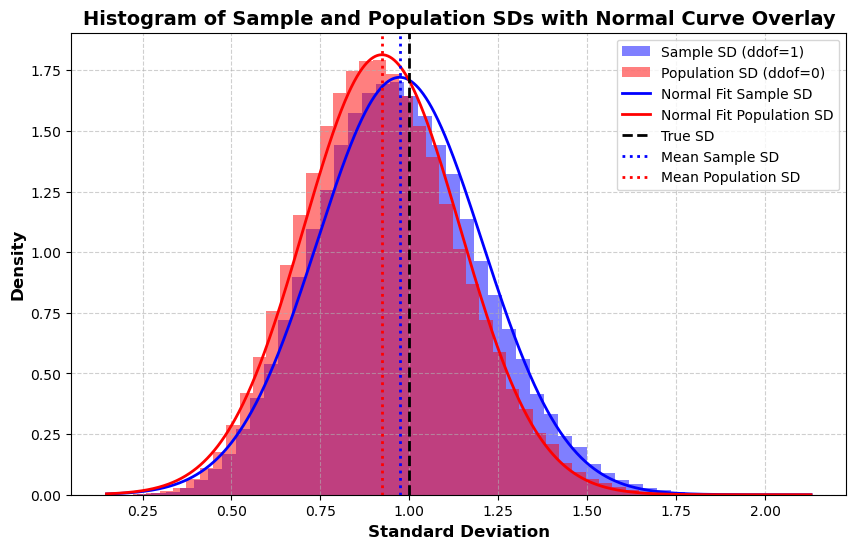

In [ ]:
# Create the plot
plt.figure(figsize=(10,6))

# Histograms
plt.hist(sample_sd, bins=50, alpha=0.5, color='blue', density=True, label='Sample SD (ddof=1)')
plt.hist(population_sd, bins=50, alpha=0.5, color='red', density=True, label='Population SD (ddof=0)')

# Normal curve overlays
plt.plot(x, y_sample, 'b-', linewidth=2, label='Normal Fit Sample SD')
plt.plot(x, y_population, 'r-', linewidth=2, label='Normal Fit Population SD')

# Mean and true SD lines
plt.axvline(1, color='black', linestyle='dashed', linewidth=2, label='True SD')
plt.axvline(np.mean(sample_sd), color='blue', linestyle='dotted', linewidth=2, label='Mean Sample SD')
plt.axvline(np.mean(population_sd), color='red', linestyle='dotted', linewidth=2, label='Mean Population SD')

# Labels and title
plt.xlabel('Standard Deviation', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Histogram of Sample and Population SDs with Normal Curve Overlay', fontsize=14, fontweight='bold')

# Legend and grid
plt.legend()
plt.grid(alpha=0.6, linestyle='--')

plt.show()


### Conclusions

#### Differences in the Histograms

- The **sample standard deviation (ddof=1)** shows a wider, more spread-out histogram because it varies more from sample to sample.
- The **population standard deviation (ddof=0)** is narrower and more concentrated around the true value, showing less variability.
- The **mean of the sample SD** is usually slightly higher than the population SD because of the degrees-of-freedom adjustment and the square-root transformation.

#### When Sample Size Increases

- The **sample SD histogram becomes narrower**, showing less 
variability.
- Both the **mean sample SD and mean population SD** move closer to 
the true standard deviation.
- The **difference between the two histograms shrinks**, and they 
overlap much more.
- With large samples, the **sample SD becomes a very accurate, 
stable estimate** of the true population SD.

***

## Problem 3: t-Tests


***

### Objective
The goal of this simulation is to examine how the **Type II error rate (β)** changes as the difference between the two population means increases.

Based on the [Detailed Explanation of Type II Error | Sapien's AI Glossary](https://www.sapien.io/glossary/definition/type-2-error), a **Type II error** occurs when a statistical test concludes in favor of the null hypothesis even though the null hypothesis is actually false. In this case, the researcher assumes data come from **two independent normal distributions**, conducts **t-tests**, and records how often the test fails to reject the null hypothesis.

### Research and Development Context
To gain a deeper understanding of **Type II errors**, the study considers several factors that influence the **statistical 
power** of a test.

1. **Sample Size**: Increasing the sample size lowers variability, hence allowing detection of true differences by the test.
A more complete description of this relationship can be shown on the Wikipedia page for [Statistical Power](https://en.wikipedia.org/wiki/Statistical_power).

2. **Level of Significance (α):** A decrease in the level of significance α reduces the probability of Type I error but increases that of Type II. Similarly, an increased α decreases β.
For more information, see the section entitled [Significance level](https://en.wikipedia.org/wiki/Statistical_significance#Significance_level) in Wikipedia.

3. **Population Variability**: If the variability in the population is high, detecting the true differences will be difficult; this increases β. Lower variability increases the Power of detection.
The [Effect size](https://en.wikipedia.org/wiki/Effect_size) article provides further insight into how variability affects statistical Power. 

4. **Directional vs. Non-directional Tests:** Where the direction of the effect is known, a one-tailed test may reduce β; where it is not, a two-tailed test provides greater generality but at some loss of sensitivity. For more information see the [One- and two-tailed tests](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests) page on Wikipedia. 

5. **Analytical Comparison:** Comparing simulation-based estimates of β with theoretical power calculations enables a more complete assessment of the simulation's validity. Analytical approaches are discussed on the [Power of a test](https://en.wikipedia.org/wiki/Power_of_a_test) page on Wikipedia. This context points out that **Type II error (β)** is influenced not only by the difference in population means but also by methodological decisions about: **sample size, significance level, population variability**, and **test direction**.

### Simulation Setup

Given this theoretical background, the subsequent simulation will be conducted to explore empirically the manner in which the **Type II error rate (β)** changes with an increased true mean difference between two populations.

For every increment of 0.1 between 0.0 and 1.0, the simulation is performed as outlined below:

---

1. **Sample Generation**  
   Two independent samples of size 100 are drawn:  
   - One from a standard normal distribution, *N*(0, 1)  
   - One from a normal distribution with mean *d* and standard deviation 1  

2. **Repetition**  
   This process is repeated 1,000 times for each value of *d*.  

3. **Hypothesis Testing**  
   - For each pair of samples, a separate independent samples *t*-test is conducted.  
   - The null hypothesis is dismissed whenever the *p*-value falls below 0.05.  

4. **Error Rate Calculation**  
   - The percentage of runs where the null hypothesis continues to hold is tracked.  
   - This represents the **Type II error rate (β)**.  

---

This allows observation of the way in which β decreases as the true difference between population means increases, hence giving empirical insight into the statistical power of the test.


#### Define Simulation Parameters

The parameters below specify the structure and precision of the simulation that estimates the **Type II error rate (β)** across varying mean differences.

- **`n`** - The sample size per group (here, 100 observations in each of two groups).  
  Larger `n` reduces sampling variability and increases the test’s statistical power.

- **`alpha`** - The significance level for the *t*-test, set at 0.05.  
  This represents a 5% risk of committing a **Type I error** (Dismissing a null hypothesis that is actually true).  
  For more details, see [Statistical significance on Wikipedia](https://en.wikipedia.org/wiki/Statistical_significance).

- **`n_sims`** — The number of independent simulation runs per condition.  
  Running many simulations (e.g., 1,000) stabilises the estimated Type II error rate.

- **`d_values`** — The true mean differences between the two populations, generated with  
  [`numpy.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).  
  The range 0.0–1.0 (in steps of 0.1) allows examination of how β changes as the difference in means grows.

- **`type2_errors`** — An empty list that will store the computed Type II error rate for each mean difference value.

Together, these settings define the simulation's experimental design.

In [14]:
# Simulation Parameters
n = 100                 # Sample size per group
alpha = 0.05            # Significance level
n_sims = 1000           # Number of simulations per condition
d_values = np.arange(0, 1.1, 0.1)  # Mean differences (0, 0.1, ..., 1.0)

# Store Type II error rates
type2_errors = []


#### Run the Vectorised Simulation

For each value of the mean difference (d), the loop performs the simulation to determine the **Type II error rate (β)**.

For every specified *d* value, the simulation executes the following procedure:

1. **Data Generation**  
   - Two independent samples are generated using [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).  
     - The first sample is drawn from *N*(0, 1) — representing the control group.  
     - The second sample is drawn from *N*(d, 1) — representing the treatment group with a true mean shift of *d*.  
   - Each sample matrix has shape *(n_sims, n)*, allowing 1,000 independent experiments to be simulated at once.  
     This vectorised approach significantly improves computational efficiency compared to looping over simulations.

2. **Statistical Testing**  
   - The [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function performs independent-samples *t*-tests for all simulations in a single call.  
   - The argument `axis=1` ensures that each row (i.e. each simulated experiment) is treated as a separate test.

3. **Type II Error Calculation**  
   - For each test, the associated *p*-value is compared to the chosen significance level (`alpha = 0.05`).  
   - The expression `p_values >= alpha` picks out tests that **fail to reject the null hypothesis** (possible Type II errors).  
   - Using [`numpy.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), the proportion of such cases is computed, giving the **estimated Type II error rate** for that *d* value.

4. **Result Storage**  
   - Each computed β value is appended to the list `type2_errors` for later analysis and visualisation.

This approach efficiently quantifies how often a *t*-test fails to detect a true difference as the underlying mean separation increases.


In [15]:
# Run vectorised simulation for each mean difference
for d in d_values:
    # Generate samples: one with mean=0, another with mean=d
    sample1 = np.random.normal(0, 1, (n_sims, n))
    sample2 = np.random.normal(d, 1, (n_sims, n))
    
    # Conduct independent samples t-tests
    t_stats, p_values = ttest_ind(sample1, sample2, axis=1)
    
    # Calculate Type II error rate (fail to reject H₀)
    type2_rate = np.mean(p_values >= alpha)
    type2_errors.append(type2_rate)


#### Visualise the Type II Error Rate (β)

The final step presents the simulation results graphically to illustrate how the **Type II error rate (β)** changes  
as the true mean difference (*d*) between two populations increases.

- The plot is created using [`matplotlib.pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html).  
  The function `plt.plot()` draws a line chart with circular markers (`marker='o'`) to highlight individual data points.  

- The **x-axis** represents the true mean difference (*d*), ranging from 0.0 to 1.0.  
- The **y-axis** shows the corresponding estimated **Type II error rate (β)** - the proportion of tests that failed to reject the null hypothesis.

- A grid (`plt.grid`) and formatted labels improve readability, while a descriptive title provides context for interpretation.  

The resulting curve demonstrates the expected inverse relationship between *d* and β:  
as the true mean difference between groups increases, the probability of failing to detect that difference (**β**) decreases,  
indicating a corresponding increase in the **statistical power** of the *t*-test.


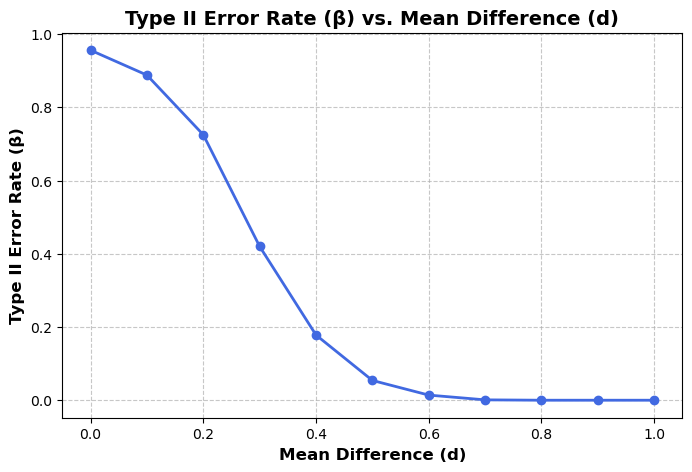

In [16]:
# Plot Type II error rate (β) as a function of the mean difference (d)
plt.figure(figsize=(8, 5))

# Line plot of β across all tested d values
plt.plot(
    d_values,
    type2_errors,
    marker='o',
    color='royalblue',
    linewidth=2
)

# Title and axis labels
plt.title(
    "Type II Error Rate (β) vs. Mean Difference (d)",
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Mean Difference (d)", fontsize=12, fontweight='bold')
plt.ylabel("Type II Error Rate (β)", fontsize=12, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


#### Table Type II Error Rates for Various Sample Sizes

To give a clear numerical summary of the simulation results,
the results are collected into a table by using the constructor of [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).
- **`pandas`** provides a flexible data structure for tabular representation and analysis.
- Two columns are created:

  - **"Mean Difference (d)"** — the true difference in population means.

  - **Type II Error Rate (β)** — the proportion of simulations that did not reject the null hypothesis at each value of d.
  the estimated proportion of simulations that failed to reject the null hypothesis for each *d*.
- The β values are limited to three decimal places by using the function [`numpy.round`](https://numpy.org/doc/stable/reference/generated/numpy.round.html), Smoothing while not sacrificing necessary precision. 

This table complements the graphical output by providing an exact numerical reference, Making the comparison of β values easier between the different mean difference conditions.

In [17]:
# Import pandas for DataFrame creation
import pandas as pd

# Create a DataFrame summarising the Type II error rates
results_df = pd.DataFrame(
    {
        "Mean Difference (d)": d_values,
        "Type II Error Rate (β)": np.round(type2_errors, 3)
    }
)

# Display the results
results_df


,Mean Difference (d),Type II Error Rate (β)
0,0.0,0.956
1,0.1,0.888
2,0.2,0.725
3,0.3,0.420
4,0.4,0.178
5,0.5,0.054
6,0.6,0.014
7,0.7,0.001
8,0.8,0.000
9,0.9,0.000


#### Results and Interpretation

When the mean difference d = 0, both samples come from the same population,
and the null hypothesis is true. The test correctly fails to reject H0
about 95% of the time, which aligns with the 5% significance level.

As the mean difference d increases, the two samples become more distinct.
The t-test is better able to detect this difference, so the Type II error rate decreases.

For large differences (e.g., d ≥ 0.8), the Type II error rate approaches zero,
meaning the test almost always detects the true difference between means.


#### Conclusion

This simulation confirms the expected relationship between effect size and
Type II error rate:

As the true mean difference increases, the probability of a Type II error decreases.

The results demonstrate that statistical tests become more powerful when the
effect size grows, meaning the t-test is more likely to correctly reject a false
null hypothesis when the difference between groups is larger.


***

## Problem 4: ANOVA

***

### Objective

The goal of this simulation is to investigate whether three independent samples, each of size 30 and drawn from normal distributions with means 0, 0.5, and 1 (standard deviation 1), originate from populations with equal means.  

This simulation will allow us to compare the outcomes of a global test (ANOVA) with multiple pairwise t-tests, highlighting the benefits of ANOVA in controlling Type I error when examining multiple groups.


### Research and Development

#### Research Objectives

- Determine whether there are statistically significant differences among the means of three populations.  
- Investigate how ANOVA performs as a global test of mean equality.  
- Examine the results of multiple t-tests between groups and their potential pitfalls.  

#### Methodology

1. **Sample Generation**  
   - Each sample contains 30 observations drawn from a normal distribution.  
   - Sample means are 0, 0.5, and 1, with a standard deviation of 1.  
   - See [NumPy Random Normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for details.

2. **Global Test (ANOVA)**  
   - Null hypothesis: all three population means are equal.  
   - ANOVA compares the variance between groups with the variance within groups to determine whether the observed differences among sample means are statistically significant.  
   - Reference: [ANOVA - Wikipedia](https://en.wikipedia.org/wiki/Analysis_of_variance)

3. **T-Tests Between Groups**  
   - Three independent t-tests are conducted: sample 1 compared with sample 2, sample 1 compared with sample 3, and sample 2 compared with sample 3.  
   - Each test examines whether the two corresponding population means differ significantly.  
   - Reference: [t-test - Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)

4. **Comparison and Interpretation**  
   - ANOVA provides a single global decision regarding mean equality, controlling the Type I error rate.  
   - T-tests between groups identify which specific pairs of means differ.
   

#### Expected Insights

- ANOVA should detect at least one significant difference if the means are truly unequal.  
- The largest differences (sample 1 compared with sample 3) are expected to be significant in t-tests.  
- Small differences (sample 1 compared with sample 2) may not be significant depending on sample variability.  
- This analysis demonstrates the advantage of using a global test like ANOVA before conducting multiple comparisons.


### Formulas for Manual Computation

For better understanding of the upcoming calculations, the following key formulas are provided. They show how variability is partitioned in ANOVA, how the F-statistic and t-statistics are computed, and how p-values are obtained.

***
1. **Sum of Squares Between Groups (SSB)** measures the variability of group means relative to the overall mean.    
   $$
   SSB = \sum_{i=1}^{k} n_i (\bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot})^2
   $$  
   where:  
   - $k$ = number of groups  
   - $n_i$ = number of observations in group $i$  
   - $\bar{y}_{i\cdot}$ = mean of group $i$  
   - $\bar{y}_{\cdot\cdot}$ = overall mean of all observations  
   See [SSB formula](https://bookdown.org/cmecklin/sta265notes/one-way-anova.html?utm_source=chatgpt.com) for details.
***

2. **Sum of Squares Within Groups (SSW)** measures the variability of observations within each group.  
   $$
   SSW = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
   $$  
   where $y_{ij}$ is the $j$-th observation in group $i$.  
   See [SSW formula](https://bookdown.org/cmecklin/sta265notes/one-way-anova.html?utm_source=chatgpt.com) for details.
***

3. **F-statistic** compares variance between groups to variance within groups.  
   $$
   F = \frac{MSB}{MSW}, \quad MSB = \frac{SSB}{k-1}, \quad MSW = \frac{SSW}{N-k}
   $$

   where:  
   - $MSB$ - Mean Square Between Groups
   - $MSW$ - Mean Square Within Groups 
   - $N$ = total number of observations  
   - $k$ = number of groups  
   - p-value is obtained from the F-distribution with $(k-1)$ and $(N-k)$ degrees of freedom  
   See [F-statistic formula](https://pages.hmc.edu/ruye/e72/lectures/StatisticTests/node5.html)
***

4. **Two-sample t-test (independent samples)** used to compare means of two groups.  
   $$
   t = \frac{\bar{y}_1 - \bar{y}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
   $$  
   - p-value is obtained from the t-distribution with the appropriate degrees of freedom  
   See [t-test formula](https://en.wikipedia.org/wiki/Student%27s_t-test#Two-sample_t-test)
***


#### Generate Samples

This section generates three normally-distributed samples with different means to simulate groups for ANOVA.  

- **`np.random.seed`** — ensures reproducible randomness. See docs: [numpy.random.seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)  

- **`np.random.normal`** — draws samples from a normal (Gaussian) distribution. See docs: [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)  
  - **`loc`** — the mean (center) of the distribution.  
  - **`scale`** — the standard deviation (spread) of the distribution.  
  - **`size`** — the number of observations to generate.  

- **`samples`** — keeps all generated groups in the list for ease of input into ANOVA tests.


In [18]:
np.random.seed(42)  # ensure reproducibility

# Samples with different means to simulate group differences
sample_1 = np.random.normal(loc=0.0, scale=1.0, size=30)
sample_2 = np.random.normal(loc=0.5, scale=1.0, size=30)
sample_3 = np.random.normal(loc=1.0, scale=1.0, size=30)

# Combine samples into a list for ANOVA input
samples = [sample_1, sample_2, sample_3]

#### Global Test (ANOVA)

#### Compute Group and Overall Means

This section calculates the mean of each sample group and the overall mean across all groups, which is useful for understanding how the variance is distributed in ANOVA.

- **`np.mean`** — computes the average value of a given array. See docs: [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

- **`np.concatenate`** — joins all the group arrays into one array on which to compute the global mean. See docs: [numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)

- **`group_means`** — stores the mean of each individual group.

- **`overall_mean`** — represents the mean across all samples.

In [19]:
# Compute means for each group and overall
group_means = [np.mean(group) for group in samples]  # mean of each group
overall_mean = np.mean(np.concatenate(samples))      # mean across all samples


#### Between- and Within-Group Sum of Squares (SSB & SSW) Calculation

This step will compute the sums of squares in Python for ANOVA based on previously computed means.

- **`ssb`** — computed by a sum over all groups.
It multiplies the number of observations in each term's group, len(samples[i]), by the squared difference between the group mean and the overall mean, group_means[i] - overall_mean.
- **`len()`** — returns the number of elements in a list or array. See docs: [Python len()](https://docs.python.org/3/library/functions.html#len)

- **`sum()`** — adds all values from an iterable. See docs: [Python sum()](https://docs.python.org/3/library/functions.html#sum)
- **`ssw`** — computed using a sum over all groups.
For every group, it's summing the squared deviations of each observation from its group mean `(samples[i] - group_means[i]) ** 2`.

- **`np.sum()`** — sums all elements of a NumPy array. See docs: [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) - **`**2`** — squares each deviation (element-wise for arrays in NumPy). This approach uses **indexing (`i`)** to iterate over `samples` and `group_means`, keeping the computation explicit and easy to follow.

In [20]:
# Compute Between-Group Sum of Squares (SSB)
ssb = sum(len(samples[i]) * (group_means[i] - overall_mean) ** 2 for i in range(len(samples)))

# Compute Within-Group Sum of Squares (SSW)
ssw = sum(np.sum((samples[i] - group_means[i]) ** 2) for i in range(len(samples)))


### Degrees of Freedom, Mean Squares, and F-statistic

This section computes the components required for the ANOVA F-test:

- **Degrees of freedom**  
  - `df_between = k - 1` — numerator df (based on number of groups)  
  - `df_within = N - k` — denominator df (based on total observations)

- **Mean squares**  
  - `MSB = SSB / df_between` — between-group variance estimate  
  - `MSW = SSW / df_within` — within-group variance estimate  

- **F-statistic**  
  Computed as the ratio of MSB to MSW.


In [21]:
# Degrees of freedom
k = len(samples)                             # number of groups
N = sum(len(group) for group in samples)     # total number of observations

df_between = k - 1                            # numerator df
df_within = N - k                             # denominator df

# Mean squares
msb = ssb / df_between
msw = ssw / df_within

# F-statistic
f_statistic = msb / msw

# show F-statistic
print("F-statistic:", f_statistic)


F-statistic: 12.209525517972805


### Compute p-value

This section calculates the **p-value** for the ANOVA F-test using the previously computed F-statistic and degrees of freedom.

- **`f.sf(x, dfn, dfd)`** — survival function (upper-tail probability) of the F-distribution. See docs: [scipy.stats.f.sf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html)  
  - `x` — observed F-statistic (`f_statistic`)  
  - `dfn` — numerator degrees of freedom (`df_between`)  
  - `dfd` — denominator degrees of freedom (`df_within`)  
- Returns the **p-value**, the probability of observing an F-statistic at least as large as `f_statistic` under the null hypothesis.


In [22]:
p_value = f.sf(f_statistic, df_between, df_within)
print("p-value:", p_value)


p-value: 2.120074814050707e-05


Interpretation of ANOVA result

In [23]:
# Interpretation of ANOVA result
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: not all group means are equal.")
else:
    print("Fail to reject the null hypothesis: no significant difference between group means.")


Reject the null hypothesis: not all group means are equal.


#### T-Tests Between Groups calculations

##### Compute Sample Means

First, the mean for each of the three samples is calculated.

These sample means are later used in pairwise t-tests to test for differences between groups.

- **`np.mean()`** — computes the arithmetic average of a NumPy array.  
- **`mean1`, `mean2`, `mean3`** — store the mean of sample 1, sample 2, and sample 3, respectively.

In [24]:
# Sample means
mean1 = np.mean(sample_1)
mean2 = np.mean(sample_2)
mean3 = np.mean(sample_3)

##### Compute Sample Variances (Unbiased)

Next, the variance for each sample is calculated, which measures the spread of data within each group.

Unbiased variances are used to compute standard errors and t-statistics in pairwise t-tests.

- **`np.var(..., ddof=1)`** — computes the sample variance with Bessel's correction (dividing by `n-1` instead of `n`). See docs: [numpy.var](https://numpy.org/doc/stable/reference/generated/numpy.var.html)  
- **`var1`, `var2`, `var3`** — store the unbiased variance of sample 1, sample 2, and sample 3.

In [25]:
# Sample variances (unbiased)
var1 = np.var(sample_1, ddof=1)
var2 = np.var(sample_2, ddof=1)
var3 = np.var(sample_3, ddof=1)

##### Compute sample sizes

Third, each sample’s size is measured by its number of observations, which is needed to compute standard errors and t-statistics for pairwise comparisons.

- **`len()`** — shows how many elements are in a list or array. See docs: [Python len()](https://docs.python.org/3/library/functions.html#len)
- **`n1`, `n2`, `n3`** —  keep track of the number of observations for sample 1, sample 2, and sample 3.

In [26]:
# Sample sizes
n1 = len(sample_1)
n2 = len(sample_2)
n3 = len(sample_3)

##### Pairwise Two-Sample t-Tests

Afterwards, independent t-tests are performed between each pair of samples to determine whether their means differ significantly.

- **1vs2, 1vs3,  2vs3** - each pair is compared using the t-statistic:
 - `se` - measure of variability between the means of the two samples  
 - `t` - t-statistic  
 - `df` - degrees of freedom  
 - `p` - two-tailed p-value indicating significance

In [30]:
# Pairwise two-sample t-tests

# 1 vs 2
se12 = np.sqrt(var1 / n1 + var2 / n2)  # standard error of the difference
t12 = (mean1 - mean2) / se12           # t-statistic
df12 = n1 + n2 - 2                      # degrees of freedom
p12 = 2 * t.sf(abs(t12), df12)          # two-tailed p-value

# 1 vs 3
se13 = np.sqrt(var1 / n1 + var3 / n3)
t13 = (mean1 - mean3) / se13
df13 = n1 + n3 - 2
p13 = 2 * t.sf(abs(t13), df13)

# 2 vs 3
se23 = np.sqrt(var2 / n2 + var3 / n3)
t23 = (mean2 - mean3) / se23
df23 = n2 + n3 - 2
p23 = 2 * t.sf(abs(t23), df23)


Below, the previously calculated t-test results are displayed along with a brief interpretation for each sample pair.

In [31]:
# Significance level for hypothesis testing
alpha = 0.05  

print("Pairwise t-tests with interpretation:\n")

# Comparison: Sample 1 vs Sample 2
print(f"1 vs 2: t = {t12:.4f}, p = {p12:.6f}")
if p12 < alpha:
    print("   Reject H0: samples 1 and 2 have different means.\n")
else:
    print("   Fail to reject H0: no significant difference between samples 1 and 2.\n")

# Comparison: Sample 1 vs Sample 3
print(f"1 vs 3: t = {t13:.4f}, p = {p13:.6f}")
if p13 < alpha:
    print("   Reject H0: samples 1 and 3 have different means.\n")
else:
    print("   Fail to reject H0: no significant difference between samples 1 and 3.\n")

# Comparison: Sample 2 vs Sample 3
print(f"2 vs 3: t = {t23:.4f}, p = {p23:.6f}")
if p23 < alpha:
    print("   Reject H0: samples 2 and 3 have different means.\n")
else:
    print("   Fail to reject H0: no significant difference between samples 2 and 3.\n")


Pairwise t-tests with interpretation:

1 vs 2: t = -2.3981, p = 0.019718
   Reject H0: samples 1 and 2 have different means.

1 vs 3: t = -4.9113, p = 0.000008
   Reject H0: samples 1 and 3 have different means.

2 vs 3: t = -2.5526, p = 0.013347
   Reject H0: samples 2 and 3 have different means.



### **Compare Conclusions: ANOVA vs. Pairwise t-Tests**

It is time to draw conclusions based on the previous calculations and the explanation given in the video [*Why is ANOVA used instead of Multiple T-test?*](https://www.youtube.com/watch?v=5B2o9v8oP0g) by YouTube channel *The Friendly Statistician*.

#### **ANOVA Results**

Consequently, the resulting F-statistic from ANOVA was very large, and the p-value was small at approximately $2.12 \times 10^{-5}$.

* Because *p < 0.05*, the null hypothesis is **rejected**.
* **Explanation:** The test confirms that **one of the group means is different** - it establishes that not all means are equal. However, ANOVA does not identify *which* groups differ. ANOVA is preferred as a preliminary test because it **looks at all groups together in a single test**.

#### **Pairwise T-Test Conclusion**

Following significant ANOVA results, three t-tests were conducted as **follow-up tests**:
1. **Sample 1 vs Sample 2**
2. **Sample 1 vs Sample 3**
3. **Sample 2 vs Sample 3**

Each comparison showed:

* A large absolute  **t-statistic**  and a very small  **p-value**.

* This implies that **all three pairwise comparisons** are significant. 

#### Overall Comparison and Final Explanation 

The results of the paired t-tests are **consistent with the ANOVA findings**. ANOVA tells you that there are overall differences-the means are not all equal-but the t-tests tell you *which* of the means are different; all pairs are significantly different. 

**Methodological advantages of ANOVA:**

This two-step procedure, ANOVA first followed by pairwise tests, is
necessary because ANOVA **controls the overall Type I error rate**.
If multiple independent t-tests were performed initially without
ANOVA, the probability of detecting such a difference through chance alone (a false-positive) increases. For example, comparing three groups by running three t-tests separately increases the chance of at least one false-positive error to about **14%**. Using ANOVA first is a **smarter way to handle comparisons** and makes the analysis **clearer and more efficient**. Follow-up tests are conducted only after a significant result is found and **often require adjustments to keep errors in check**.

**Final Interpretation:**

All three groups have significantly different means, and this
conclusion is **strongly supported by both the ANOVA and the subsequent pairwise t-tests**.

### **Why ANOVA Is Preferred Over Running Several t‑Tests**

ANOVA is preferred over running several t‑tests because performing multiple independent t‑tests greatly increases the risk of a **Type I error** (a false positive). As shown in the video [*Why is ANOVA used instead of Multiple T‑tests?*](https://www.youtube.com/watch?v=5B2o9v8oP0g), each additional t‑test raises the probability of detecting a difference purely by chance. This issue is also highlighted in the Laerd Statistics guide under *[Why not compare groups with multiple t‑tests?](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php#:~:text=Why%20not%20compare%20groups%20with%20multiple%20t%2Dtests%3F)*, which explains that repeated t‑tests inflate the overall error rate. ANOVA avoids this problem by using **one overall test** to evaluate all groups simultaneously, keeping the error rate properly controlled before any follow‑up comparisons are made.

***
### End